In [162]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


In [163]:
NEURAL_NETWORKS = ['DenseNet201', 'MobileNetV2', 'InceptionV3']
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [164]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)

In [165]:
#main_pd

In [166]:
# valores maximos e minos das acuracias
main_pd['accuracy_median'].max()
main_pd['accuracy_median'].min()

86.37057840824127

In [167]:
# Dados para DenseNet201
dense_data = main_pd[main_pd['model'] == 'DenseNet201']
x_rois_dense = dense_data['subset']
y_acuracy_mean_dense = dense_data['accuracy_mean']
y_precision_mean_dense = dense_data['precision_mean']
y_medidaf_mean_dense = dense_data['f1_score_mean']
y_total_runtime_mean_dense = dense_data['total_runtime']

# Dados para InceptionV3
inception_data = main_pd[main_pd['model'] == 'InceptionV3']
x_rois_inception = inception_data['subset']  
y_acuracy_mean_inception = inception_data['accuracy_mean'] 
y_precision_mean_inception = inception_data['precision_mean']
y_medidaf_mean_inception = inception_data['f1_score_mean']
y_total_runtime_mean_inception = inception_data['total_runtime']


# Dados para MobileNetV2
mobnet_data = main_pd[main_pd['model'] == 'MobileNetV2']
x_rois_mobnet = mobnet_data['subset']  
y_acuracy_mean_mobnet = mobnet_data['accuracy_mean']
y_precision_mean_mobnet = mobnet_data['precision_mean']
y_medidaf_mean_mobnet= mobnet_data['f1_score_mean']
y_total_runtime_mean_mobnet = mobnet_data['total_runtime']


# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate((x_rois_dense, x_rois_inception, x_rois_mobnet)))
range_rois =  np.arange(5, 100, 10)


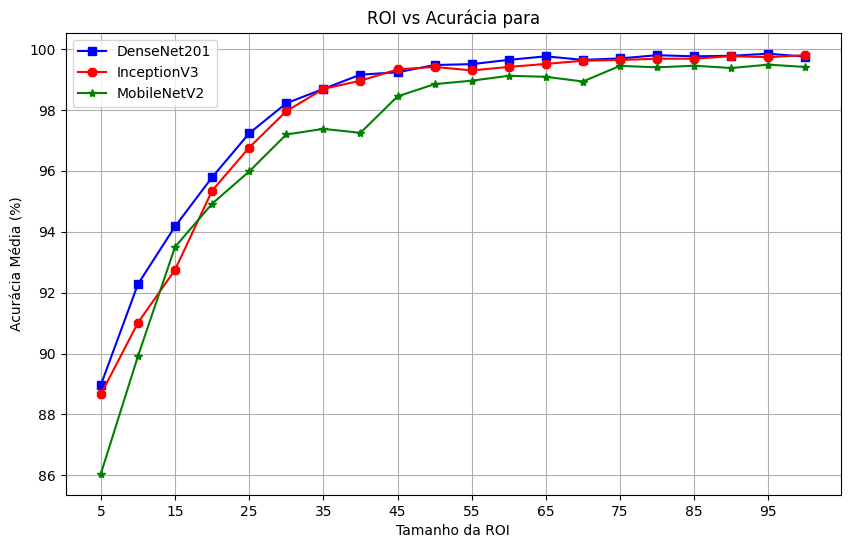

In [168]:

# Criação do gráfico acuracia x rois
plt.figure(figsize=(10, 6))
plt.plot(full_rois, y_acuracy_mean_dense, marker='s', linestyle='-', color='b', label='DenseNet201')
plt.plot(full_rois, y_acuracy_mean_inception, marker='8', linestyle='-', color='r', label='InceptionV3')
plt.plot(full_rois, y_acuracy_mean_mobnet, marker='*', linestyle='-', color='g', label='MobileNetV2')
plt.title('ROI vs Acurácia ')
plt.xlabel('Tamanho da ROI')
plt.ylabel('Acurácia Média (%)')
plt.xticks(range_rois)  # Configura as marcas do eixo X para mostrar todos os ROIs
plt.grid(True)
plt.legend()
plt.show()


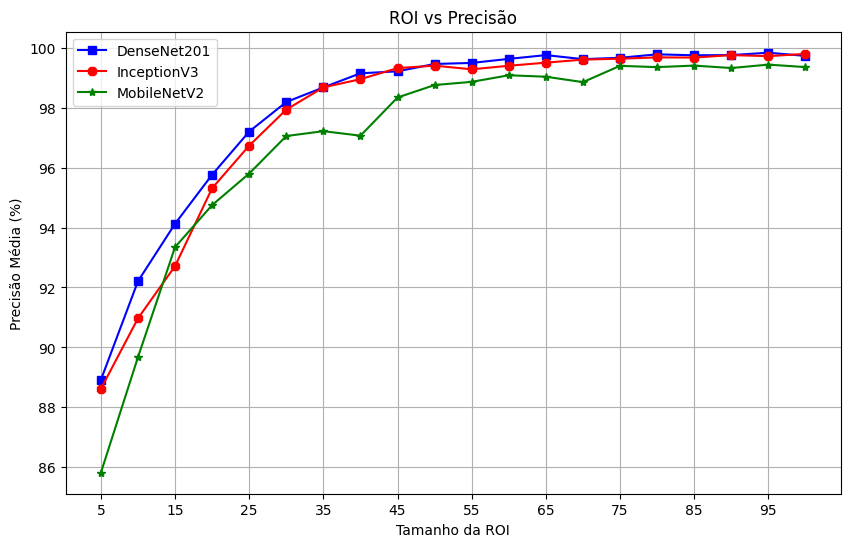

In [169]:

# Criação do gráfico roi x precisao
plt.figure(figsize=(10, 6))
plt.plot(full_rois, y_precision_mean_dense, marker='s', linestyle='-', color='b', label='DenseNet201')
plt.plot(full_rois, y_precision_mean_inception, marker='8', linestyle='-', color='r', label='InceptionV3')
plt.plot(full_rois, y_precision_mean_mobnet, marker='*', linestyle='-', color='g', label='MobileNetV2')
plt.title('ROI vs Precisão')
plt.xlabel('Tamanho da ROI')
plt.ylabel('Precisão Média (%)')
plt.xticks(range_rois)  # Configura as marcas do eixo X para mostrar todos os ROIs
plt.grid(True)
plt.legend()
plt.show()


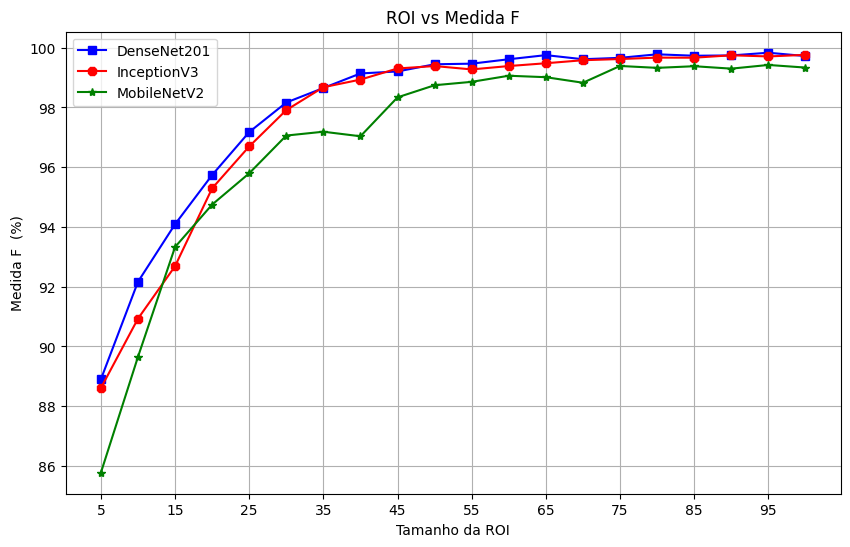

In [170]:

# Criação do gráfico roi x media F
plt.figure(figsize=(10, 6))
plt.plot(full_rois, y_medidaf_mean_dense, marker='s', linestyle='-', color='b', label='DenseNet201')
plt.plot(full_rois, y_medidaf_mean_inception, marker='8', linestyle='-', color='r', label='InceptionV3')
plt.plot(full_rois, y_medidaf_mean_mobnet, marker='*', linestyle='-', color='g', label='MobileNetV2')
plt.title('ROI vs Medida F')
plt.xlabel('Tamanho da ROI')
plt.ylabel('Medida F  (%)')
plt.xticks(range_rois)  # Configura as marcas do eixo X para mostrar todos os ROIs
plt.grid(True)
plt.legend()
plt.show()


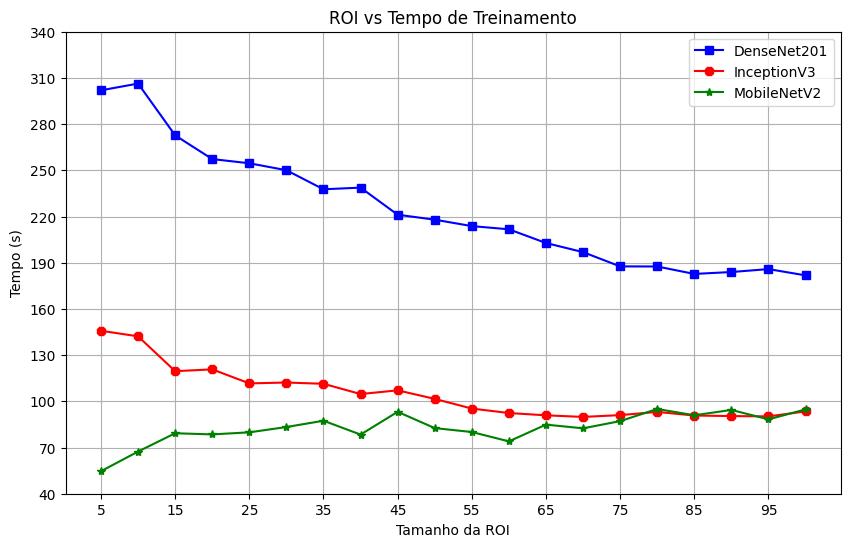

In [187]:

range_time = np.arange(40, 360, 30)
# Criação do gráfico roi x tempo treinamento
plt.figure(figsize=(10, 6))
plt.plot(full_rois, y_total_runtime_mean_dense, marker='s', linestyle='-', color='b', label='DenseNet201')
plt.plot(full_rois, y_total_runtime_mean_inception, marker='8', linestyle='-', color='r', label='InceptionV3')
plt.plot(full_rois, y_total_runtime_mean_mobnet, marker='*', linestyle='-', color='g', label='MobileNetV2')
plt.title('ROI vs Tempo de Treinamento')
plt.xlabel('Tamanho da ROI')
plt.ylabel('Tempo (s)')
plt.yticks(range_time)
plt.xticks(range_rois)  # Configura as marcas do eixo X para mostrar todos os ROIs
plt.grid(True)
plt.legend()
plt.show()


In [ ]:

# Criação do gráfico roi x tempo treinamento
plt.figure(figsize=(10, 6))
plt.plot(full_rois, y_total_runtime_mean_dense, marker='s', linestyle='-', color='b', label='DenseNet201')
plt.plot(full_rois, y_total_runtime_mean_inception, marker='8', linestyle='-', color='r', label='InceptionV3')
plt.plot(full_rois, y_total_runtime_mean_mobnet, marker='*', linestyle='-', color='g', label='MobileNetV2')
plt.title('ROI vs Medida F')
plt.xlabel('Tamanho da ROI')
plt.ylabel('Tempo (s)')
plt.xticks(range_rois)  # Configura as marcas do eixo X para mostrar todos os ROIs
plt.grid(True)
plt.legend()
plt.show()
